### Imports

In [13]:
# import public packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Rectangle
import scipy
import mne
import sys


from mne.time_frequency import tfr_morlet
from mne.baseline import rescale
from scipy.signal import spectrogram, hann, butter, filtfilt, hilbert
from scipy import signal, interpolate
from scipy.interpolate import make_interp_spline, BSpline
from io import open
from importlib import reload

# import own functions
from utils import find_folders
import dat_preproc
import fix_annot_onsets
import mat2fif

### Add Directories / Load Files

In [2]:
#reload(find_folders)
onedrive = find_folders.get_onedrive_path()
ftg_path = find_folders.get_onedrive_path("FTG")
print(ftg_path)

C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\FTG_PROJECT


In [3]:
percept_ID = 'sub029'
fname = 'sub-029_ses-EphysMedOn01_task-RampUpThres125_acq-StimOnR2b_run-01_ieeg.mat'

raw = mne.io.read_raw_fieldtrip(
    os.path.join(
        ftg_path,
        'data',
        'raw_data',
        'raw_mats',
        percept_ID,
        fname
    ),
    info = None
)

Creating RawArray with float64 data, n_channels=6, n_times=122625
    Range : 0 ... 122624 =      0.000 ...   490.496 secs
Ready.


c:\Users\mathiopv\Anaconda3\lib\site-packages\pymatreader\utils.py:230: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '
C:\Users\mathiopv\AppData\Local\Temp\ipykernel_2284\1682337492.py:4: RuntimeWarning: Importing FieldTrip data without an info dict from the original file. Channel locations, orientations and types will be incorrect. The imported data cannot be used for source analysis, channel interpolation etc.
  raw = mne.io.read_raw_fieldtrip(
C:\Users\mathiopv\AppData\Local\Temp\ipykernel_2284\1682337492.py:4: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  raw = mne.io.read_raw_fieldtrip(
C:\Users\mathiopv\AppData\Local\Temp\ipykernel_2284\1682337492.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_

#### Artefact Rejection & FIF Files

In [4]:
#Interactive plot for artefact rejection
%matplotlib qt 
raw.plot()
'''
fig = raw.plot(n_channels = 2, highpass = 5, lowpass = 100, 
    filtorder = 5, duration = 20)
'''

'\nfig = raw.plot(n_channels = 2, highpass = 5, lowpass = 100, \n    filtorder = 5, duration = 20)\n'

In [6]:
#First time making them
interactive_annot = raw.annotations
raw.annotations.save('Sub029_Bilateral_artefactsAnnotations.csv', 
    overwrite = True)

In [32]:
#Importing them later
interactive_annot = pd.read_csv(
    os.path.join(
        ftg_path,
        'data',
        'raw_data',
        'clean_fifs',
        'sub029',
        'Sub029_RampUpThres_artefactsAnnotations.csv'
    )
)

#fix timing in imported annotations
reload(fix_annot_onsets)
new_onsets = fix_annot_onsets.fix_annot_onsets(interactive_annot)
print(new_onsets)

[ 20.8  27.2  31.7  34.4  77.2  93.7 115.2 123.2 145.6 168.5 186.3 217.7
 228.6 317.1 350.8 357.8 366.1 451.3 477.8 480.3 482.3 484.3 487.4 489.3]


In [33]:
my_annot = mne.Annotations(onset=new_onsets,  # in seconds
                           duration=interactive_annot.duration,  # in seconds, too
                           description=interactive_annot.description,
                           orig_time=raw.info['meas_date'])

reload(mat2fif)
%matplotlib qt
new_raw = mat2fif.mat2fif(raw,my_annot)

Omitting 4700 of 122625 (3.83%) samples, retaining 117925 (96.17%) samples.
Creating RawArray with float64 data, n_channels=6, n_times=117925
    Range : 0 ... 117924 =      0.000 ...   471.696 secs
Ready.
Using matplotlib as 2D backend.


Channels marked as bad:
none


In [75]:
#Plot TF plot with artefact rejected data
%matplotlib qt
reload(dat_preproc)
x = new_raw.get_data(reject_by_annotation = 'omit',picks=[0,1])
raw = new_raw
win_samp = 250
noverlap = 0.5
window = hann(win_samp, sym=False)
f, t, Sxx = dat_preproc.fft_rawviz(raw, x, win_samp, noverlap)

### Plot Brain Sense Survey

In [172]:
raw = mne.io.read_raw_fieldtrip(
    os.path.join(
        ftg_path,
        'data',
        'raw_data',
        'raw_mats',
        "sub029",
        "sub-029_ses-EphysMedOn01_task-Rest_acq-StimOffRSegIntra_run-02_ieeg.mat"
    ),
    info = None
)

Creating RawArray with float64 data, n_channels=3, n_times=5125
    Range : 0 ... 5124 =      0.000 ...    20.496 secs
Ready.


<ipython-input-172-856c859994bb>:10: RuntimeWarning: Importing FieldTrip data without an info dict from the original file. Channel locations, orientations and types will be incorrect. The imported data cannot be used for source analysis, channel interpolation etc.
  info = None
<ipython-input-172-856c859994bb>:10: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['LFP_Stn_R_1_A1_A', 'LFP_Stn_R_1_B1_B', 'LFP_Stn_R_1_C1_C']
  info = None
<ipython-input-172-856c859994bb>:10: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  info = None
<ipython-input-172-856c859994bb>:10: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_R_1_A1_A. Making it a MISC channel.
  info = None
<ipython-input-172-856c859994bb>:10: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_R_1_B1_B. Making it a MISC channel.
  info = None
<ip

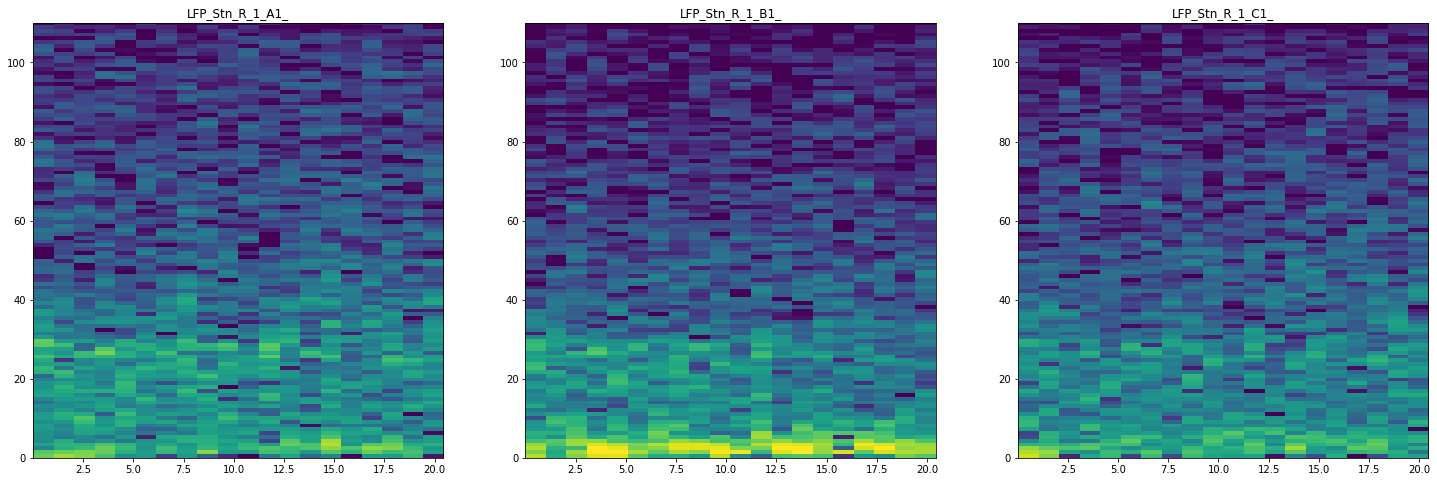

In [173]:
#reload(dat_preproc)
x = raw.get_data()
f, t, Sxx = scipy.signal.spectrogram(x = x, fs = 250, window = window, noverlap = 0.5)

%matplotlib inline
fig = plt.figure(figsize=(25, 8))

if x.shape[0] == 3:
    n_rows = 1
elif x.shape[0] == 6:
    n_rows = 2

for k in range(0,x.shape[0]):
    plt.subplot(n_rows,3,k+1)
    plt.specgram(x = x[k,:], Fs = 250, noverlap = noverlap, cmap = 'viridis', vmin = -25, vmax =20)
    plt.ylim(0,110)
    plt.title(raw.ch_names[k])


### Plot Power Spectra in epochs

In [67]:
%matplotlib inline
stim_onsets = [1, 30, 110, 240]
labels = ['Ipsi_Stim','NoStim','Contra_Stim','Bilateral']
dur = 20

#for l in range(0,4):
    #plt.plot(np.mean(Sxx[1,:,stim_onsets[l]:stim_onsets[l]+dur],1), label = labels[l])
    #plt.xlim(40, 90)
    #plt.ylim(0,0.5)
tt, Pxx = scipy.signal.welch(Sxx[1,1:20], fs = 250, nperseg = 250, noverlap = 0.25)
plt.plot(np.arange(1,127), np.mean(Pxx[0],1), label = labels[l])

plt.legend(labels)

IndexError: tuple index out of range

In [7]:
anal_signal = hilbert(raw.get_data(picks = 1))

c:\Users\mathiopv\Anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
t:\Dokumente\PROJECTS\DYSKINESIA_PROJECT\FTG_GithubCode\dat_preproc.py:133: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=1).
  plt.specgram(x = x, Fs = fs, noverlap = noverlap, cmap = 'viridis',
c:\Users\mathiopv\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


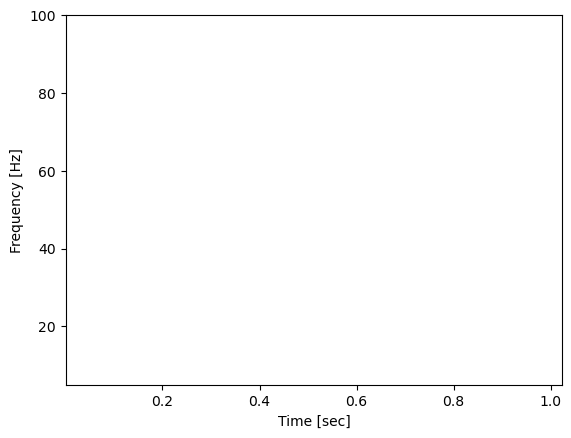

In [15]:
x = anal_signal
win_samp = 250
noverlap = 0.5
f, t, Sxx = dat_preproc.fft_transform(x, win_samp, noverlap)


In [18]:
raw.apply_hilbert

<bound method apply_hilbert of <RawArray | 6 x 122625 (490.5 s), ~5.6 MB, data loaded>>

In [21]:
reload(dat_preproc)
x = raw.get_data(picks = 1)
dat_subh = dat_preproc.low_highpass_filter(x, 60, 65)
dat_ngam = dat_preproc.low_highpass_filter(x, 65, 90)

In [23]:
sub_hil = hilbert(dat_subh)
ngam_hil = hilbert(dat_ngam)

In [27]:
sub_hil.shape

(1, 122625)

c:\Users\mathiopv\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


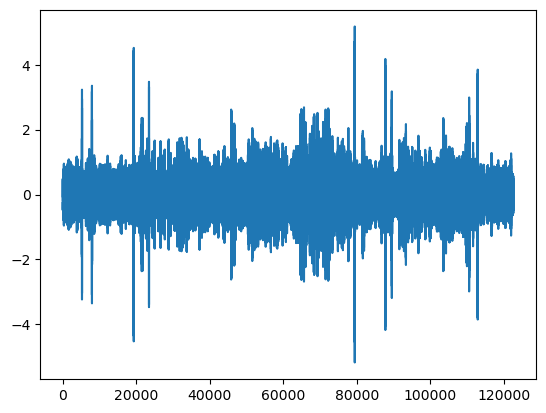

In [31]:
plt.plot(np.arange(1,122626),sub_hil[0])

In [55]:
# let's explore some frequency bands
iter_freqs = [
    ('Beta', 13, 35),
    ('SubGamma', 60, 65),
    ('NarrGamma', 65, 90)
]

In [56]:
rec_event = mne.Annotations(onset=50,  # in seconds
                           duration=260,  # in seconds, too
                           description='Full_Rec')
new_raw.set_annotations(rec_event)

events_from_annot, event_dict = mne.events_from_annotations(new_raw)

Used Annotations descriptions: ['Full_Rec']


In [74]:
trial = new_raw.pick_types('misc')

ValueError: meg value must be one of ['grad', 'mag', 'planar1', 'planar2'] or bool, not misc

In [73]:
# set epoching parameters
event_id, tmin, tmax = 1, 0, 270.
baseline = None

# get the header to extract events
frequency_map = list()

for band, fmin, fmax in iter_freqs:
    # (re)load the data to save memory
    new_raw = new_raw
    new_raw.get_data('misc')
    #raw.pick_types(meg='grad', eog=True)  # we just look at gradiometers
    #raw.load_data()
    # bandpass filter
    new_raw.filter(fmin, fmax,n_jobs=None,  # use more jobs to speed up.
               l_trans_bandwidth=1,  # make sure filter params are the same
               h_trans_bandwidth=1)  # in each band and skip "auto" option.

    # epoch
    epochs = mne.Epochs(new_raw, events_from_annot, event_dict, tmin, tmax, baseline=baseline,
                        preload=True)
    # remove evoked response
    #epochs.subtract_evoked()

    # get analytic signal (envelope)
    epochs.apply_hilbert(envelope=True)
    frequency_map.append(((band, fmin, fmax), epochs.average()))
    del epochs
#del raw

ValueError: meg value must be one of ['grad', 'mag', 'planar1', 'planar2'] or bool, not misc

In [68]:
# Helper function for plotting spread
def stat_fun(x):
    """Return sum of squares."""
    return np.sum(x ** 2, axis=0)


# Plot
fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.colormaps['winter_r'](np.linspace(0, 1, 4))
for ((freq_name, fmin, fmax), average), color, ax in zip(
        frequency_map, colors, axes.ravel()[::-1]):
    times = average.times * 1e3
    gfp = np.sum(average.data ** 2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle='--', color='grey', linewidth=2)
    ci_low, ci_up = bootstrap_confidence_interval(average.data, random_state=0,
                                                  stat_fun=stat_fun)
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel('GFP')
    ax.annotate('%s (%d-%dHz)' % (freq_name, fmin, fmax),
                xy=(0.95, 0.8),
                horizontalalignment='right',
                xycoords='axes fraction')
    ax.set_xlim(-1000, 3000)

axes.ravel()[-1].set_xlabel('Time [ms]')

Applying baseline correction (mode: mean)


NameError: name 'bootstrap_confidence_interval' is not defined